<a href="https://colab.research.google.com/github/dbright123/Dbot-Advance/blob/main/lstm_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



In [ ]:
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

trade_active = mt5.initialize()

print(trade_active)

if not trade_active:
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.5200
True
{'login': 213644473, 'trade_mode': 0, 'leverage': 1000, 'limit_orders': 500, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 200.0, 'credit': 0.0, 'profit': 0.0, 'equity': 200.0, 'margin': 0.0, 'margin_free': 200.0, 'margin_level': 0.0, 'margin_so_call': 25.0, 'margin_so_so': 15.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'micheal bright omage ', 'server': 'OctaFX-Demo', 'currency': 'USD', 'company': 'Octa Markets Incorporated'}


{'community_account': True, 'community_connection': True, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 5200, 'maxbars': 100000, 'codepage': 0, 'ping_last': 1

In [ ]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

200.0
AI is successfully functional


In [ ]:
symbols = mt5.symbols_get()
print(len(symbols))
t_symbol = []
for symbol in symbols:
    if("USD" in symbol.name):
        #print("Yes ", symbol.name)
        t_symbol.append(symbol.name)

print(len(t_symbol))

280
65


In [ ]:
n = 0
for t_s in t_symbol:
    market = mt5.copy_rates_from_pos(t_s, mt5.TIMEFRAME_H1, 0, 99999)
    if(len(market) > 99990):
        data = []
        for i in range(len(market)):
            data.append([market[i][1],market[i][2],market[i][3],market[i][4]])
        df = pd.DataFrame(data, columns=["open", "high","low", "close"])
        df.to_csv("Generated"+t_s+" dbot.csv", index=False)
    n += 1

In [ ]:
import joblib

joblib.dump(t_symbol,"symbol.joblib")

['symbol.joblib']

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import joblib
import os
from sklearn.model_selection import train_test_split

In [6]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00


In [7]:
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt



from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import visualkeras

In [8]:
# Get the list of all files and directories in the specified path

dir_contents = os.listdir(".")
t_symbol = joblib.load("symbol.joblib")

In [9]:

# Filter the list to include only files, not directories
# os.path.join is used to create a full path for isfile() to check
files = [item for item in dir_contents]

file_target = []

for filename in files:
    for t_s in t_symbol:
        if t_s in filename:
            print(filename)
            file_target.append(filename)
print("----------------------------------------------------")

print(len(file_target))

train_dfs = []
for f_t in file_target:
    train_dfs.append(pd.read_csv(f_t))

GeneratedUSDMXN dbot.csv
GeneratedUSDCHF dbot.csv
GeneratedEURUSD dbot.csv
GeneratedAUDUSD dbot.csv
GeneratedUSDCAD dbot.csv
GeneratedNZDUSD dbot.csv
GeneratedGBPUSD dbot.csv
GeneratedUSDJPY dbot.csv
----------------------------------------------------
8


In [10]:
def create_sequences(data_scaled, seq_len):
    """
    data_scaled: np.array shaped (n_rows, n_features)
    returns X (n_samples, seq_len, n_features), y (n_samples, n_features)
    where y is the row immediately following the window.
    """
    X, y = [], []
    n_rows = data_scaled.shape[0]
    for i in range(n_rows - seq_len):
        X.append(data_scaled[i:i+seq_len])
        y.append(data_scaled[i+seq_len])
    X = np.array(X)
    y = np.array(y)
    return X, y





In [ ]:
#train_df = pd.read_csv("GeneratedGBPUSD dbot.csv")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.04035, saving model to GeneratedUSDMXN lstm_multivar_best.keras
37/37 - 11s - 291ms/step - loss: 0.0958 - mae: 0.2494 - mape: 717.1968 - msle: 0.0556 - root_mean_squared_error: 0.3095 - val_loss: 0.0404 - val_mae: 0.1808 - val_mape: 132.0922 - val_msle: 0.0223 - val_root_mean_squared_error: 0.2009 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.04035 to 0.00061, saving model to GeneratedUSDMXN lstm_multivar_best.keras
37/37 - 2s - 53ms/step - loss: 0.0225 - mae: 0.1200 - mape: 4672.9731 - msle: 0.0131 - root_mean_squared_error: 0.1498 - val_loss: 6.0717e-04 - val_mae: 0.0191 - val_mape: 7.6772 - val_msle: 2.6914e-04 - val_root_mean_squared_error: 0.0246 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00061 to 0.00029, saving model to GeneratedUSDMXN lstm_multivar_best.keras
37/37 - 2s - 56ms/step - loss: 0.0028 - mae: 0.0401 - mape: 134.1477 - msle: 0.0013 - root_mean_squared_err

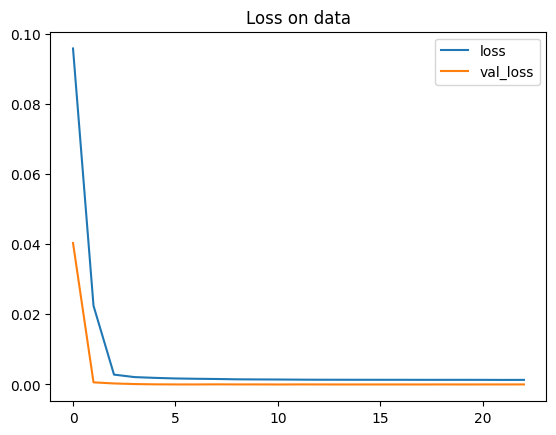

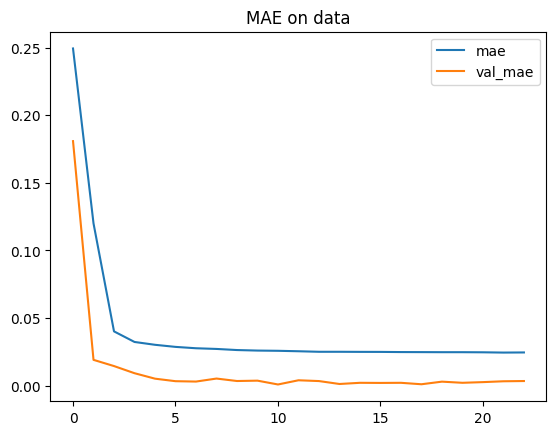

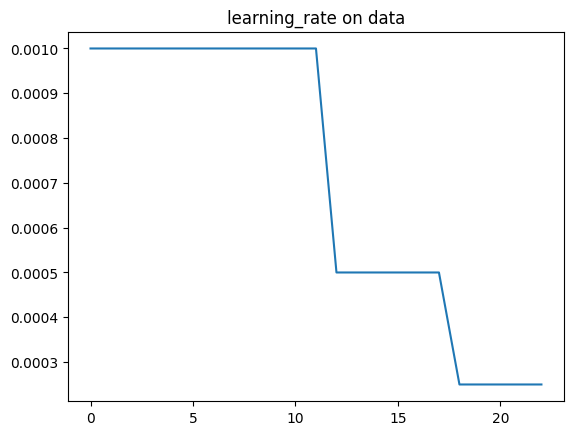

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.03946, saving model to GeneratedUSDCHF lstm_multivar_best.keras
37/37 - 5s - 136ms/step - loss: 0.0967 - mae: 0.2504 - mape: 121.2890 - msle: 0.0562 - root_mean_squared_error: 0.3110 - val_loss: 0.0395 - val_mae: 0.1791 - val_mape: 129.7850 - val_msle: 0.0218 - val_root_mean_squared_error: 0.1986 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.03946 to 0.00045, saving model to GeneratedUSDCHF lstm_multivar_best.keras
37/37 - 1s - 25ms/step - loss: 0.0233 - mae: 0.1244 - mape: 2664.5964 - msle: 0.0135 - root_mean_squared_error: 0.1528 - val_loss: 4.4880e-04 - val_mae: 0.0178 - val_mape: 15.2279 - val_msle: 2.6941e-04 - val_root_mean_squared_error: 0.0212 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00045 to 0.00033, saving model to GeneratedUSDCHF lstm_multivar_best.keras
37/37 - 1s - 30ms/step - loss: 0.0032 - mae: 0.0421 - mape: 781.8057 - msle: 0.0014 - root_mean_squared_error: 0.0567 -

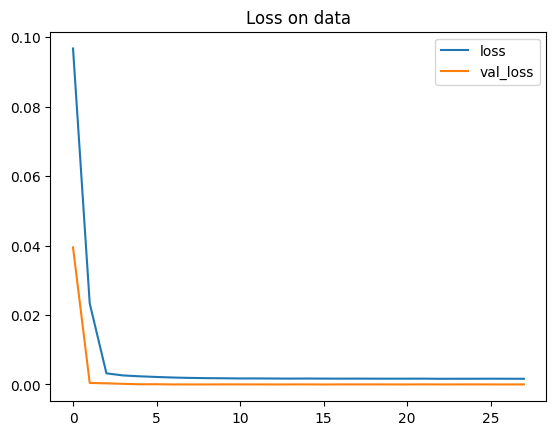

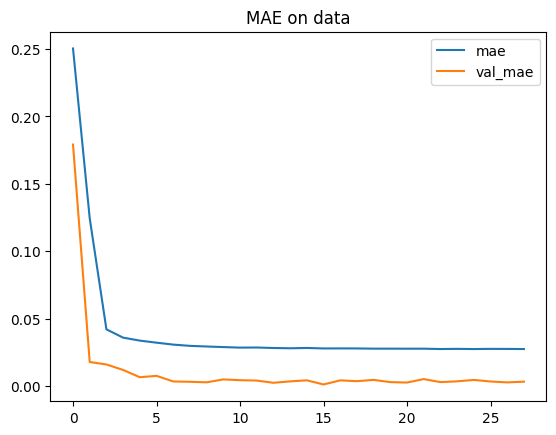

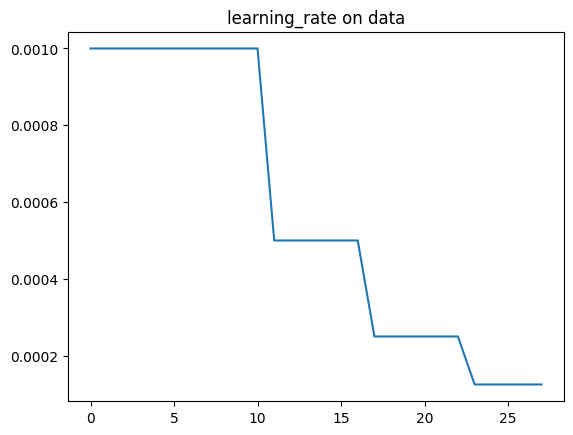

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.04157, saving model to GeneratedEURUSD lstm_multivar_best.keras
37/37 - 4s - 120ms/step - loss: 0.0970 - mae: 0.2519 - mape: 316.0040 - msle: 0.0563 - root_mean_squared_error: 0.3115 - val_loss: 0.0416 - val_mae: 0.1840 - val_mape: 132.8769 - val_msle: 0.0229 - val_root_mean_squared_error: 0.2039 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.04157 to 0.00043, saving model to GeneratedEURUSD lstm_multivar_best.keras
37/37 - 1s - 21ms/step - loss: 0.0244 - mae: 0.1262 - mape: 4018.5867 - msle: 0.0141 - root_mean_squared_error: 0.1562 - val_loss: 4.2628e-04 - val_mae: 0.0149 - val_mape: 5.9813 - val_msle: 1.7756e-04 - val_root_mean_squared_error: 0.0206 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00043 to 0.00034, saving model to GeneratedEURUSD lstm_multivar_best.keras
37/37 - 1s - 22ms/step - loss: 0.0028 - mae: 0.0405 - mape: 453.7226 - msle: 0.0013 - root_mean_squared_error: 0.0533 - 

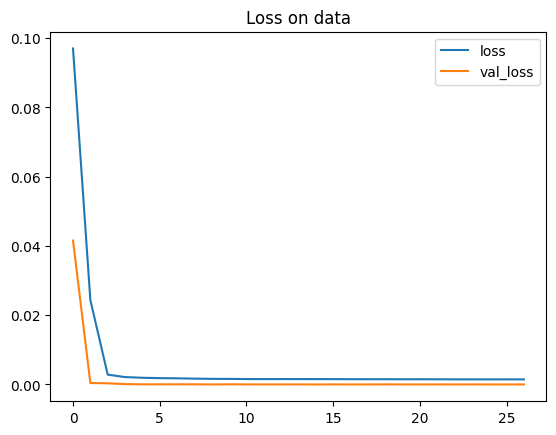

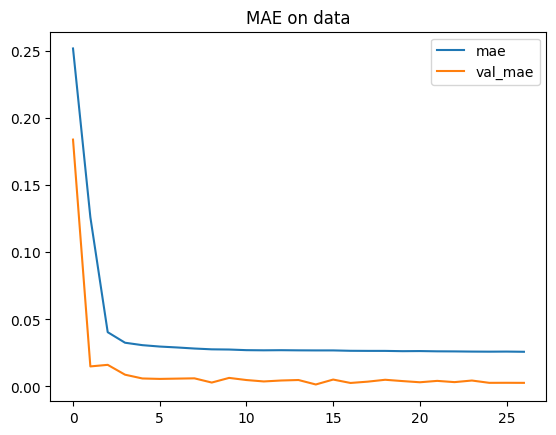

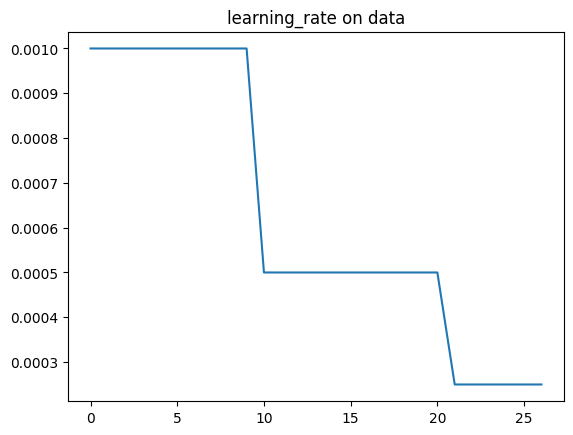

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.03987, saving model to GeneratedAUDUSD lstm_multivar_best.keras
37/37 - 5s - 122ms/step - loss: 0.0994 - mae: 0.2541 - mape: 1788.6587 - msle: 0.0578 - root_mean_squared_error: 0.3153 - val_loss: 0.0399 - val_mae: 0.1785 - val_mape: 134.2781 - val_msle: 0.0222 - val_root_mean_squared_error: 0.1997 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.03987 to 0.00065, saving model to GeneratedAUDUSD lstm_multivar_best.keras
37/37 - 1s - 21ms/step - loss: 0.0245 - mae: 0.1281 - mape: 3738.1880 - msle: 0.0142 - root_mean_squared_error: 0.1566 - val_loss: 6.5211e-04 - val_mae: 0.0189 - val_mape: 20.1887 - val_msle: 4.4945e-04 - val_root_mean_squared_error: 0.0255 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00065 to 0.00037, saving model to GeneratedAUDUSD lstm_multivar_best.keras
37/37 - 1s - 33ms/step - loss: 0.0029 - mae: 0.0402 - mape: 775.4713 - msle: 0.0013 - root_mean_squared_error: 0.0536 

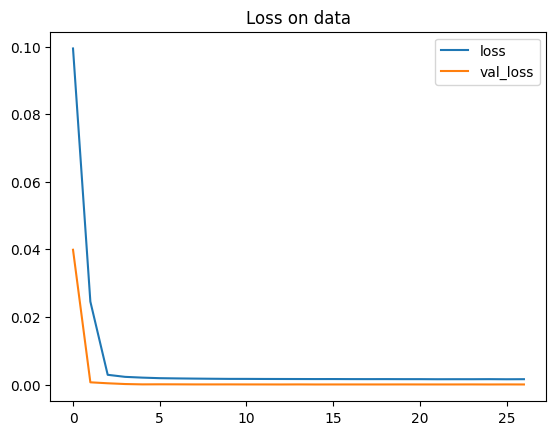

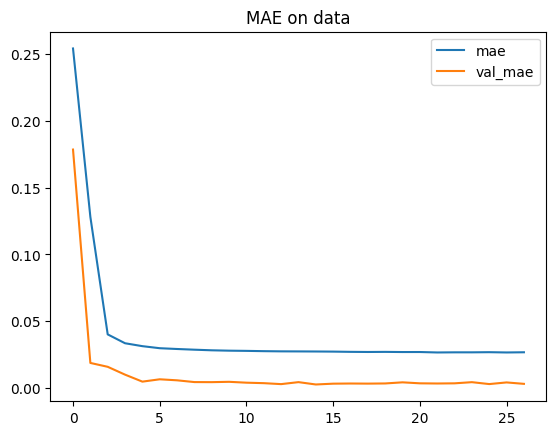

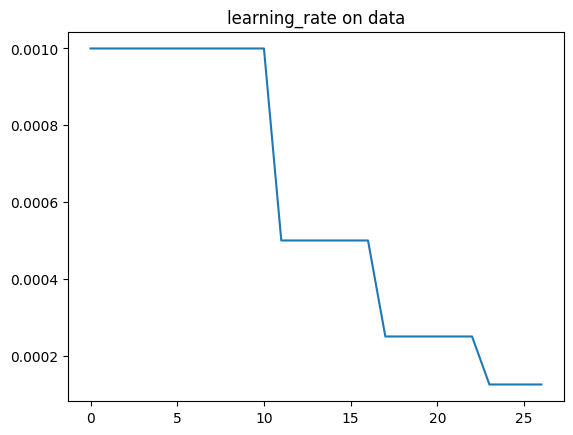

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.04075, saving model to GeneratedUSDCAD lstm_multivar_best.keras
37/37 - 5s - 140ms/step - loss: 0.1032 - mae: 0.2590 - mape: 2862.0073 - msle: 0.0601 - root_mean_squared_error: 0.3213 - val_loss: 0.0407 - val_mae: 0.1790 - val_mape: 138.5752 - val_msle: 0.0229 - val_root_mean_squared_error: 0.2019 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.04075 to 0.00215, saving model to GeneratedUSDCAD lstm_multivar_best.keras
37/37 - 2s - 46ms/step - loss: 0.0273 - mae: 0.1370 - mape: 4768.6191 - msle: 0.0158 - root_mean_squared_error: 0.1652 - val_loss: 0.0022 - val_mae: 0.0299 - val_mape: 38.5619 - val_msle: 0.0017 - val_root_mean_squared_error: 0.0464 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00215 to 0.00045, saving model to GeneratedUSDCAD lstm_multivar_best.keras
37/37 - 1s - 21ms/step - loss: 0.0028 - mae: 0.0399 - mape: 802.8431 - msle: 0.0013 - root_mean_squared_error: 0.0527 - val_lo

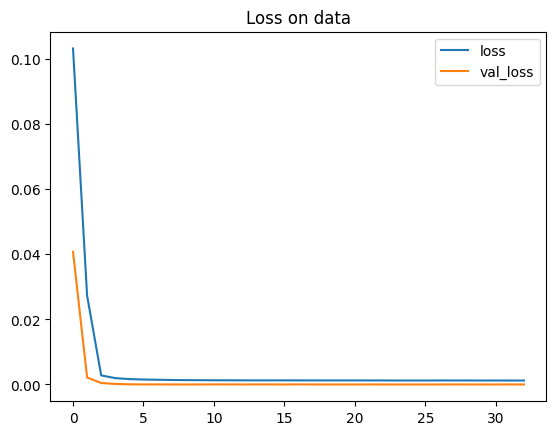

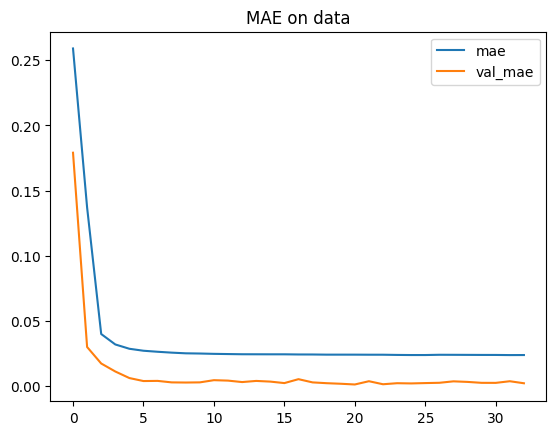

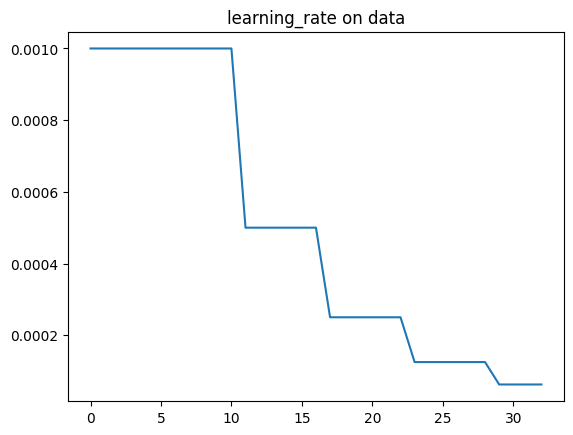

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.04223, saving model to GeneratedNZDUSD lstm_multivar_best.keras
37/37 - 5s - 140ms/step - loss: 0.0950 - mae: 0.2487 - mape: 6153.0264 - msle: 0.0551 - root_mean_squared_error: 0.3082 - val_loss: 0.0422 - val_mae: 0.1862 - val_mape: 131.8059 - val_msle: 0.0231 - val_root_mean_squared_error: 0.2055 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.04223 to 0.00047, saving model to GeneratedNZDUSD lstm_multivar_best.keras
37/37 - 1s - 21ms/step - loss: 0.0239 - mae: 0.1243 - mape: 3823.8103 - msle: 0.0138 - root_mean_squared_error: 0.1545 - val_loss: 4.6538e-04 - val_mae: 0.0160 - val_mape: 6.3717 - val_msle: 1.9960e-04 - val_root_mean_squared_error: 0.0216 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00047 to 0.00023, saving model to GeneratedNZDUSD lstm_multivar_best.keras
37/37 - 1s - 34ms/step - loss: 0.0026 - mae: 0.0389 - mape: 558.1223 - msle: 0.0012 - root_mean_squared_error: 0.0507 -

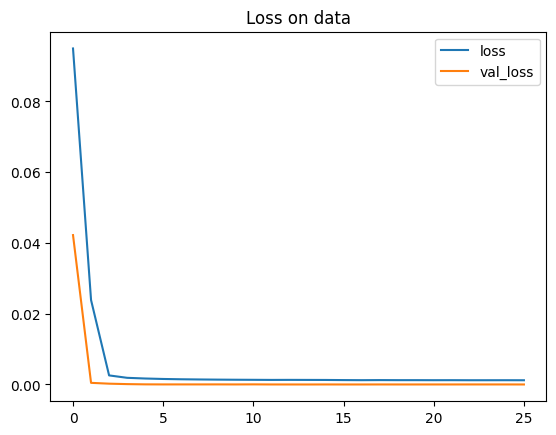

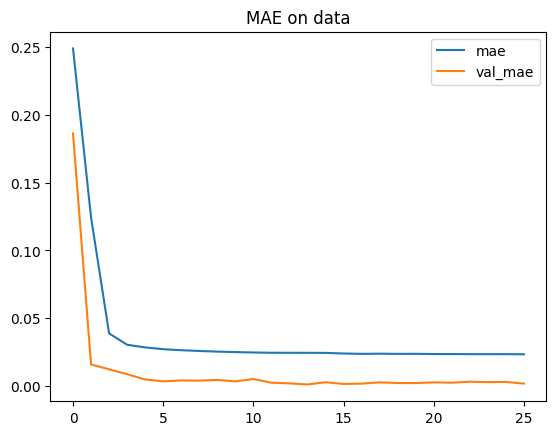

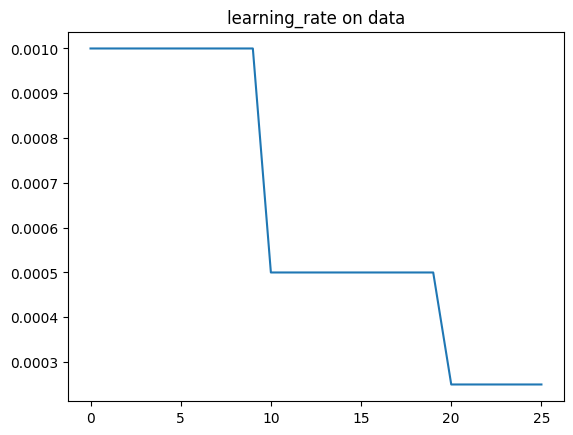

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.04180, saving model to GeneratedGBPUSD lstm_multivar_best.keras
37/37 - 5s - 122ms/step - loss: 0.0949 - mae: 0.2480 - mape: 651.3588 - msle: 0.0551 - root_mean_squared_error: 0.3081 - val_loss: 0.0418 - val_mae: 0.1844 - val_mape: 133.3900 - val_msle: 0.0230 - val_root_mean_squared_error: 0.2045 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.04180 to 0.00041, saving model to GeneratedGBPUSD lstm_multivar_best.keras
37/37 - 1s - 20ms/step - loss: 0.0245 - mae: 0.1268 - mape: 4778.2998 - msle: 0.0142 - root_mean_squared_error: 0.1565 - val_loss: 4.0638e-04 - val_mae: 0.0156 - val_mape: 7.6079 - val_msle: 1.7927e-04 - val_root_mean_squared_error: 0.0202 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00041 to 0.00017, saving model to GeneratedGBPUSD lstm_multivar_best.keras
37/37 - 1s - 37ms/step - loss: 0.0026 - mae: 0.0387 - mape: 673.1691 - msle: 0.0012 - root_mean_squared_error: 0.0513 - 

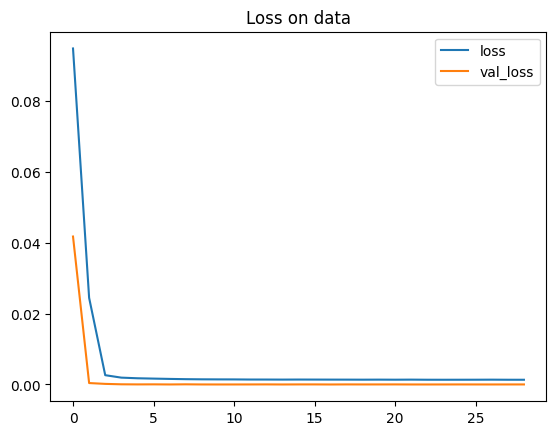

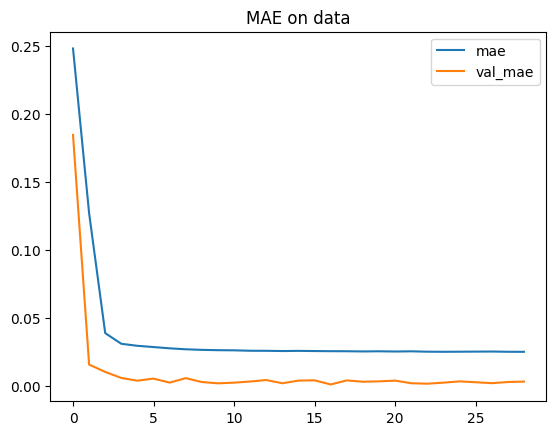

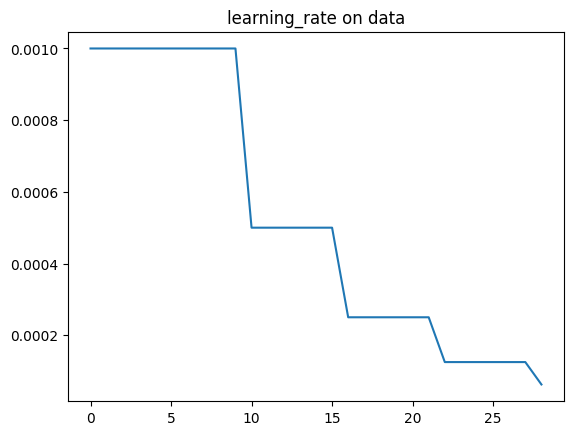

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,201 (1.11 MB)

 Trainable params: 292,201 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")



Epoch 1: val_loss improved from inf to 0.03992, saving model to GeneratedUSDJPY lstm_multivar_best.keras
37/37 - 5s - 134ms/step - loss: 0.1015 - mae: 0.2572 - mape: 6565.8540 - msle: 0.0592 - root_mean_squared_error: 0.3186 - val_loss: 0.0399 - val_mae: 0.1783 - val_mape: 134.8724 - val_msle: 0.0223 - val_root_mean_squared_error: 0.1998 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_loss improved from 0.03992 to 0.00052, saving model to GeneratedUSDJPY lstm_multivar_best.keras
37/37 - 1s - 20ms/step - loss: 0.0246 - mae: 0.1284 - mape: 4241.7407 - msle: 0.0142 - root_mean_squared_error: 0.1570 - val_loss: 5.1665e-04 - val_mae: 0.0171 - val_mape: 17.3061 - val_msle: 3.3797e-04 - val_root_mean_squared_error: 0.0227 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_loss improved from 0.00052 to 0.00031, saving model to GeneratedUSDJPY lstm_multivar_best.keras
37/37 - 1s - 34ms/step - loss: 0.0030 - mae: 0.0409 - mape: 791.1546 - msle: 0.0013 - root_mean_squared_error: 0.0546 

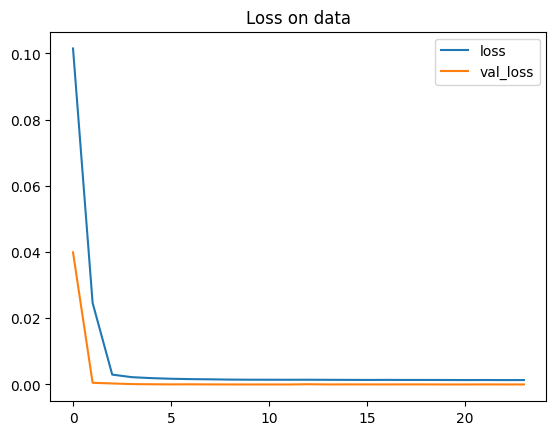

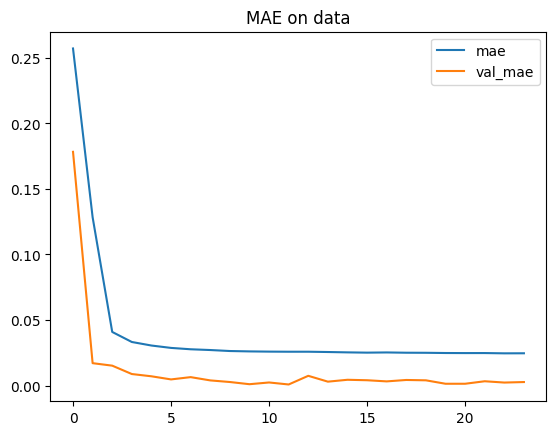

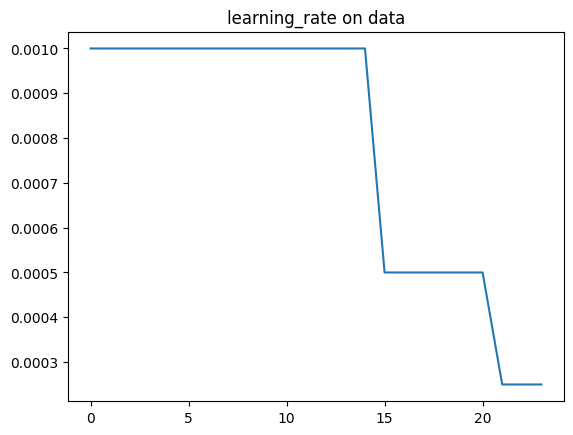

In [11]:
for i in range(len(train_dfs)):
    m_label = file_target[i].replace("dbot.csv","")
    train_df = train_dfs[0]
    SEQ_LEN = 672              # length of input sequence (timesteps). Typical choices: 30, 60, 90
    n_rows, n_features = train_df.values.shape
    X, y = create_sequences(train_df.values[:,-1], SEQ_LEN)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)

    n_samples = X.shape[0]

    scaler = MinMaxScaler(feature_range=(0, 1))
    X = y.reshape((X.shape[0],1))
    y = y.reshape((y.shape[0],1))
    X = scaler.fit_transform(X,y)

    y = scaler.transform(y)
    joblib.dump(scaler, m_label + 'scaler.joblib')
    X = X.reshape((X.shape[0],X.shape[1],1))
    y = y.reshape((y.shape[0],y.shape[1],1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45, shuffle=True)
    X_val, X_test, y_val,  y_test = train_test_split(X_test, y_test, test_size=0.01, random_state=45, shuffle=True)

    seq_len = X_train.shape[1]
    n_features = X_train.shape[2]
    output_dim = y_train.shape[1]

    i = Input(shape=(seq_len, n_features))
    X = LSTM(100, return_sequences=True)(i)
    X = LSTM(100, return_sequences=True)(X)
    X = LSTM(100, return_sequences=True)(X)
    X = LSTM(100)(X)
    X = Dense(100, activation="relu")(X)
    X = Dropout(0.25)(X)
    X = Dense(output_dim)(X)

    model = Model(i, X)
    model.summary()
    visualkeras.layered_view(model, to_file= m_label + 'output.png').show()

    es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=2)
    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=2)
    mc = ModelCheckpoint(m_label + 'lstm_multivar_best.keras', monitor='val_loss', save_best_only=True, verbose=2)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae',tf.keras.metrics.RootMeanSquaredError(),'mape','msle'])
    r = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=100,
      batch_size=2048,
      callbacks=[es, rlr, mc ],
      verbose=2

    )

    plt.title("Loss on data")
    plt.plot(r.history['loss'], label="loss")
    plt.plot(r.history['val_loss'], label="val_loss")
    plt.legend()
    plt.show()

    plt.title("MAE on data")
    plt.plot(r.history['mae'], label="mae")
    plt.plot(r.history['val_mae'], label="val_mae")
    plt.legend()
    plt.show()

    plt.title("learning_rate on data")
    plt.plot(r.history['learning_rate'], label="loss")

    plt.show()

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(MODEL_SAVE_PATH)

In [ ]:
y_pred = best_model.predict(X_test)
print(y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
[[0.49620852]
 [0.68953353]
 [0.49996358]
 [0.43279144]
 [0.78977853]
 [0.8151706 ]
 [0.65260327]
 [0.40981048]
 [0.89835984]
 [0.36542094]
 [0.8521255 ]
 [0.51139814]
 [0.7702351 ]
 [0.30002812]
 [0.80484664]
 [0.7663195 ]
 [0.59886825]
 [0.68825394]
 [0.37792253]
 [0.5419367 ]
 [0.7570923 ]
 [0.7525305 ]
 [0.31649825]
 [0.66380125]
 [0.8719513 ]
 [0.60711527]
 [0.5453205 ]
 [0.50836337]
 [0.43067202]
 [0.30436453]
 [0.26977953]
 [0.7843148 ]
 [0.401546  ]
 [0.5702943 ]
 [0.78779817]
 [0.32578835]
 [0.82540435]
 [0.16844574]
 [0.38570946]
 [0.6550078 ]
 [0.7932039 ]
 [0.3134185 ]
 [0.81182486]
 [0.691687  ]
 [0.17259136]
 [0.745109  ]
 [0.89925015]
 [0.70879906]
 [0.76660997]
 [0.31209752]
 [0.29890776]
 [0.6866739 ]
 [0.73098147]
 [0.7545593 ]
 [0.563294  ]
 [0.4181124 ]
 [0.09390943]
 [0.3225024 ]
 [0.7302677 ]
 [0.7197868 ]
 [0.42540088]
 [0.4205166 ]
 [0.81547904]
 [0.87806904]
 [0.36730626]
 [0.86412895]
 [0.82889664]
 [0.7135937 ]
 [0.738047

In [ ]:
print(y_test)

[[[0.50142412]]

 [[0.69545904]]

 [[0.50529065]]

 [[0.43544222]]

 [[0.79272738]]

 [[0.81707767]]

 [[0.6591107 ]]

 [[0.41119523]]

 [[0.89616446]]

 [[0.36422131]]

 [[0.85233394]]

 [[0.51703782]]

 [[0.77391125]]

 [[0.2991839 ]]

 [[0.80718998]]

 [[0.77013326]]

 [[0.60565812]]

 [[0.69420463]]

 [[0.37737046]]

 [[0.54822095]]

 [[0.76121958]]

 [[0.75680701]]

 [[0.31540267]]

 [[0.67016425]]

 [[0.87116483]]

 [[0.61390771]]

 [[0.55165951]]

 [[0.51392394]]

 [[0.4332138 ]]

 [[0.30346364]]

 [[0.26913711]]

 [[0.78747362]]

 [[0.40242913]]

 [[0.57693954]]

 [[0.79082363]]

 [[0.3245082 ]]

 [[0.82686206]]

 [[0.16910907]]

 [[0.38556102]]

 [[0.6614867 ]]

 [[0.79601836]]

 [[0.31237733]]

 [[0.81387524]]

 [[0.6975694 ]]

 [[0.17300512]]

 [[0.74961999]]

 [[0.89700565]]

 [[0.71430469]]

 [[0.77041366]]

 [[0.31107864]]

 [[0.29807706]]

 [[0.69265507]]

 [[0.73591004]]

 [[0.75876979]]

 [[0.56987057]]

 [[0.41997609]]

 [[0.09791768]]

 [[0.32129101]]

 [[0.73521642]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test.reshape((len(y_test),1)), y_pred.reshape((len(y_pred),1)))

0.999752218369367

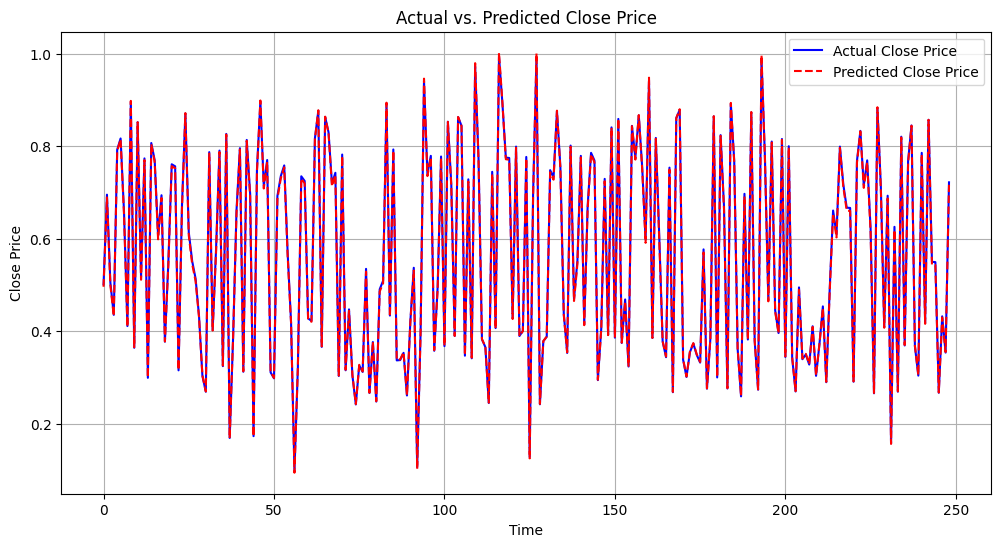

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, -1], label='Actual Close Price', color='blue')
plt.plot(y_pred[:, -1], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

In [ ]:
# Save this as plot_forecast.py and run where your model, x_test, y_test (and optional scalers) are available.

import numpy as np
import matplotlib.pyplot as plt

def ensure_2d_preds(preds):
    """Normalize model.predict outputs to shape (n_samples, n_features)."""
    preds = np.asarray(preds)
    if preds.ndim == 3:
        # common case: (n_samples, 1, n_features) or (n_samples, seq_len, n_features)
        # we assume model outputs final-step predictions if seq_len>1
        if preds.shape[1] == 1:
            preds = preds[:, 0, :]
        else:
            preds = preds[:, -1, :]
    elif preds.ndim == 1:
        preds = preds.reshape(-1, 1)
    return preds

def plot_test_vs_pred_close(y_test, preds, output_index=-1, figsize=(12,5), savepath=None):
    """
    Plot actual vs predicted for the 'close' column (default last column).
    y_test: (n, n_features)
    preds: (n, n_features)
    """
    y_test = np.asarray(y_test)
    preds = np.asarray(preds)
    # normalize shapes
    preds = ensure_2d_preds(preds)

    actual_close = y_test[:, output_index]
    pred_close   = preds[:, output_index]

    plt.figure(figsize=figsize)
    plt.plot(actual_close, label='Actual Close')
    plt.plot(pred_close, label='Predicted Close')
    plt.xlabel('Time (test index)')
    plt.ylabel('Close price')
    plt.title('Actual vs Predicted Close Price (test set)')
    plt.legend()
    plt.grid(True)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()

def recursive_forecast(model, last_window, n_steps=2000):
    """
    Do recursive multi-step forecasting:
      - model.predict expects input shape (1, window_len, n_features)
      - last_window: shape (window_len, n_features)
      - returns array shape (n_steps, n_features)
    """
    last_window = last_window.reshape((len(last_window),1))
    if last_window.ndim != 2:
        raise ValueError("last_window must be 2D: (window_len, n_features)")

    window_len, n_features = last_window.shape
    history = last_window.copy()
    preds = []
    for i in range(n_steps):
        x_in = history.reshape(1, window_len, n_features)
        p = model.predict(x_in)
        p = ensure_2d_preds(p)[0]  # shape: (n_features,)
        preds.append(p)
        # slide window
        history = np.vstack([history[1:], p.reshape(1, n_features)])
    return np.vstack(preds)  # shape (n_steps, n_features)

def plot_extended_series(y_test, future_preds, output_index=-1, figsize=(14,5), savepath=None):
    """
    Plot the test-close series and appended future predictions as one continuous line.
    """
    actual_close = np.asarray(y_test)[:, output_index]
    future_close = np.asarray(future_preds)[:, output_index]
    combined = np.concatenate([actual_close, future_close])

    plt.figure(figsize=figsize)
    plt.plot(combined, label='Actual (test) + Forecast (future)')
    # mark border between known and forecast
    split_index = len(actual_close)
    plt.axvline(split_index - 0.5, linestyle='--', linewidth=1)
    plt.text(split_index + 5, combined[split_index], ' Forecast starts', va='center')
    plt.xlabel('Time (index)')
    plt.ylabel('Close price')
    plt.title(f'Actual Close (test) and {len(future_close)} Step Forecast')
    plt.legend()
    plt.grid(True)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


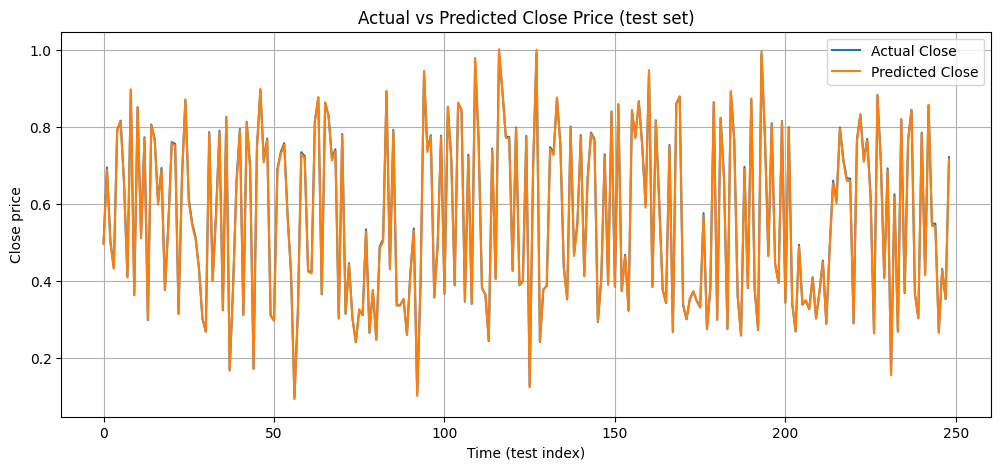

In [ ]:
# ------------------------------------------------------------
# USAGE (example)
# ------------------------------------------------------------
# Assumptions:
# - x_test shape = (n_samples, window_len, n_features) e.g. (6247, 48, 4)
# - y_test shape = (n_samples, n_features) e.g. (6247, 4)
# - model.predict(x_test) -> (n_samples, n_features) (or shape convertible)
#
# Optional:
# - scaler_X (used during training on inputs) or scaler_y (used on outputs).
#   If present, inverse_transform predictions and y_test before plotting.
#
# Replace these names with your actual variables present in the workspace.

# Example (uncomment and run where variables exist):
preds_test = best_model.predict(X_test)
preds_test = ensure_2d_preds(preds_test)

# # 1) plot actual vs predicted (test)
plot_test_vs_pred_close(y_test, preds_test, output_index=-1, savepath='test_vs_pred.png')


In [ ]:
#
# # 2) recursive forecast next 2000 values starting from last input window:
last_window = X_test[-1].reshape((len(X_test[-1]),1))   # shape (window_len, n_features)
future_preds = recursive_forecast(best_model, last_window, n_steps=200)
future_preds_inv = future_preds

# # 3) plot extended series (append future close to test close)
plot_extended_series(y_test, future_preds_inv, output_index=-1, savepath='extended_forecast.png')
#
# # Optional: save future_preds_inv to disk
# # np.save('future_preds.npy', future_preds_inv)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)